In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data sets 

sales_data = pd.read_csv("E:\sales.csv")
stock_data = pd.read_csv("E:\sensor_stock_levels.csv")
temp_data = pd.read_csv("E:\sensor_storage_temperature.csv")

In [3]:
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
stock_data.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [5]:
temp_data.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [6]:
#removing 'unnamed' column

sales_data.drop("Unnamed: 0",axis=1,inplace=True)
stock_data.drop("Unnamed: 0",axis=1,inplace=True)
temp_data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [9]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [10]:
#changing data type

sales_data['timestamp'] = pd.to_datetime(sales_data['timestamp'])
stock_data['timestamp'] = pd.to_datetime(stock_data['timestamp'])
temp_data['timestamp'] = pd.to_datetime(temp_data['timestamp'])

In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [12]:
sales_data['product_id'].value_counts()

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64

In [13]:
stock_data['product_id'].value_counts()

product_id
89845097-f0ec-4702-bb65-85c67cf94490    89
46867178-bebf-45ef-a894-5fd012d4cd4d    86
ad81b46c-bf38-41cf-9b54-5fe7f5eba93e    85
c6a1bffa-3aa9-42ec-a137-7be02834c373    82
0ddc2379-adba-4fb0-aa97-19fcafc738a1    81
                                        ..
b40062ea-e0be-41a7-b3b4-258416575039    26
4c105f9d-bb57-44e9-9c0a-410922e9214e    26
3dfcdda6-5fd8-498d-8825-2a7af5da3a09    24
a8fab83a-16d4-4db0-a83a-f824ecd8604a    23
5adfc643-aa8e-4140-b2c3-98a946444632    23
Name: count, Length: 300, dtype: int64

### Merging data sets

* Problem statement :  “Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”

In [14]:
# We must transform the time stamp column on hourly basis as per the problem statement.

sales_data['timestamp'] = pd.to_datetime(sales_data['timestamp'].dt.floor('H'))
stock_data['timestamp'] = pd.to_datetime(stock_data['timestamp'].dt.floor('H'))
temp_data['timestamp'] = pd.to_datetime(temp_data['timestamp'].dt.floor('H'))                                

In [15]:
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [16]:
stock_data.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [17]:
temp_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [18]:
# Checking for duplicate values

sales_data.duplicated().sum()

0

In [19]:
sales_data['timestamp'].head()

0   2022-03-02 09:00:00
1   2022-03-06 10:00:00
2   2022-03-04 17:00:00
3   2022-03-02 17:00:00
4   2022-03-05 14:00:00
Name: timestamp, dtype: datetime64[ns]

In [20]:
stock_data.duplicated().sum()

0

In [21]:
stock_data['timestamp'].head()

0   2022-03-07 12:00:00
1   2022-03-07 16:00:00
2   2022-03-01 18:00:00
3   2022-03-02 14:00:00
4   2022-03-02 13:00:00
Name: timestamp, dtype: datetime64[ns]

In [22]:
temp_data.duplicated().sum()

0

In [23]:
temp_data['timestamp'].head()

0   2022-03-07 15:00:00
1   2022-03-01 09:00:00
2   2022-03-04 15:00:00
3   2022-03-02 12:00:00
4   2022-03-05 09:00:00
Name: timestamp, dtype: datetime64[ns]

In [24]:
# We want quantity, unit price, category from sales data

sales_new = sales_data.groupby(['timestamp','product_id'])['quantity'].sum().reset_index()
sales_new.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [25]:
sales_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   6217 non-null   datetime64[ns]
 1   product_id  6217 non-null   object        
 2   quantity    6217 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 145.8+ KB


In [26]:
sales_new['product_id'].value_counts()

product_id
3bc6c1ea-0198-46de-9ffd-514ae3338713    60
80da8348-1707-403f-8be7-9e6deeccc883    59
35e00193-aa27-4121-87f4-6ac0d8a8671f    59
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    59
ad81b46c-bf38-41cf-9b54-5fe7f5eba93e    57
                                        ..
49f7d4a9-713a-4824-b378-aebb33ff8b2f     5
a8fab83a-16d4-4db0-a83a-f824ecd8604a     5
8653ceaf-6e7f-498c-b8ca-5a6bb6a15dae     5
5adfc643-aa8e-4140-b2c3-98a946444632     4
ec0bb9b5-45e3-4de8-963d-e92aa91a201e     3
Name: count, Length: 300, dtype: int64

In [27]:
# We need estimated stock from the stock data

stock_new = stock_data.groupby(['timestamp','product_id'])['estimated_stock_pct'].sum().reset_index()
stock_new.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [28]:
stock_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 254.3+ KB


In [29]:
# We need temprature from temp data 

temp_new = temp_data.groupby(['timestamp'])['temperature'].sum().reset_index()
temp_new.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-9.03
1,2022-03-01 10:00:00,393.00
2,2022-03-01 11:00:00,-171.92
3,2022-03-01 12:00:00,-158.09
4,2022-03-01 13:00:00,-59.64


In [30]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [31]:
# Now that we have got relevant columns, we can merger the data sets now.

merged_data = stock_new.merge(sales_new, on = ['timestamp','product_id'], how='left')
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [32]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 339.0+ KB


In [33]:
merged_data = merged_data.merge(temp_new, on='timestamp', how='left')
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-9.03
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-9.03
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-9.03


In [34]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


In [35]:
# Lets add features which may help us in modelling.

product_categories = sales_data[['product_id', 'category']]
product_price = sales_data[['product_id', 'unit_price']]

In [36]:
merged_data = merged_data.merge(product_categories, on="product_id", how="left")
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen


In [37]:
merged_data.drop_duplicates(inplace=True)

In [38]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen
38,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03,vegetables
114,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-9.03,baby products
135,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-9.03,beverages
146,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-9.03,pets


In [39]:
merged_data = merged_data.merge(product_price, on="product_id", how="left")
merged_data.drop_duplicates(inplace=True)

In [40]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen,11.19
38,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03,vegetables,1.49
114,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-9.03,baby products,14.19
135,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-9.03,beverages,20.19
146,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-9.03,pets,8.19


In [41]:
merged_data['quantity'] = merged_data['quantity'].fillna(0)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845 entries, 0 to 304733
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


In [42]:
## We need to split timestamp column for machine to understand the date time features

merged_data['timestamp'].head()

0     2022-03-01 09:00:00
38    2022-03-01 09:00:00
114   2022-03-01 09:00:00
135   2022-03-01 09:00:00
146   2022-03-01 09:00:00
Name: timestamp, dtype: datetime64[ns]

In [43]:
merged_data['timestamp_day_of_month'] = merged_data['timestamp'].dt.day
merged_data['timestamp_day_of_week'] = merged_data['timestamp'].dt.dayofweek
merged_data['timestamp_hour'] = merged_data['timestamp'].dt.hour

In [44]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen,11.19,1,1,9
38,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03,vegetables,1.49,1,1,9
114,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-9.03,baby products,14.19,1,1,9
135,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-9.03,beverages,20.19,1,1,9
146,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-9.03,pets,8.19,1,1,9


In [45]:
# Droping time stamp column

merged_data.drop('timestamp',axis=1,inplace=True)
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,kitchen,11.19,1,1,9
38,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03,vegetables,1.49,1,1,9
114,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-9.03,baby products,14.19,1,1,9
135,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-9.03,beverages,20.19,1,1,9
146,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-9.03,pets,8.19,1,1,9


In [46]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845 entries, 0 to 304733
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              10845 non-null  object 
 1   estimated_stock_pct     10845 non-null  float64
 2   quantity                10845 non-null  float64
 3   temperature             10845 non-null  float64
 4   category                10845 non-null  object 
 5   unit_price              10845 non-null  float64
 6   timestamp_day_of_month  10845 non-null  int32  
 7   timestamp_day_of_week   10845 non-null  int32  
 8   timestamp_hour          10845 non-null  int32  
dtypes: float64(4), int32(3), object(2)
memory usage: 720.2+ KB


In [47]:
merged_data['category'].dtypes

dtype('O')

In [48]:
merged_data = merged_data.rename(columns={'category':'prod_category'})

In [49]:
merged_data = pd.get_dummies(merged_data, columns=['prod_category'])
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,prod_category_baby products,prod_category_baked goods,...,prod_category_meat,prod_category_medicine,prod_category_packaged foods,prod_category_personal care,prod_category_pets,prod_category_refrigerated items,prod_category_seafood,prod_category_snacks,prod_category_spices and herbs,prod_category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,11.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
38,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03,1.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,True
114,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-9.03,14.19,1,1,9,True,False,...,False,False,False,False,False,False,False,False,False,False
135,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-9.03,20.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
146,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-9.03,8.19,1,1,9,False,False,...,False,False,False,False,True,False,False,False,False,False


In [50]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845 entries, 0 to 304733
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   product_id                           10845 non-null  object 
 1   estimated_stock_pct                  10845 non-null  float64
 2   quantity                             10845 non-null  float64
 3   temperature                          10845 non-null  float64
 4   unit_price                           10845 non-null  float64
 5   timestamp_day_of_month               10845 non-null  int32  
 6   timestamp_day_of_week                10845 non-null  int32  
 7   timestamp_hour                       10845 non-null  int32  
 8   prod_category_baby products          10845 non-null  bool   
 9   prod_category_baked goods            10845 non-null  bool   
 10  prod_category_baking                 10845 non-null  bool   
 11  prod_category_beverages         

In [51]:
for col in merged_data.columns:
    if merged_data[col].dtype == 'bool':
        merged_data[col] = merged_data[col].astype(int)

In [52]:
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,prod_category_baby products,prod_category_baked goods,...,prod_category_meat,prod_category_medicine,prod_category_packaged foods,prod_category_personal care,prod_category_pets,prod_category_refrigerated items,prod_category_seafood,prod_category_snacks,prod_category_spices and herbs,prod_category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-9.03,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
38,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-9.03,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
114,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-9.03,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
135,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-9.03,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
146,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-9.03,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
## We will drop the product id column

merged_data.drop('product_id',axis=1,inplace=True)

In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845 entries, 0 to 304733
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   estimated_stock_pct                  10845 non-null  float64
 1   quantity                             10845 non-null  float64
 2   temperature                          10845 non-null  float64
 3   unit_price                           10845 non-null  float64
 4   timestamp_day_of_month               10845 non-null  int32  
 5   timestamp_day_of_week                10845 non-null  int32  
 6   timestamp_hour                       10845 non-null  int32  
 7   prod_category_baby products          10845 non-null  int32  
 8   prod_category_baked goods            10845 non-null  int32  
 9   prod_category_baking                 10845 non-null  int32  
 10  prod_category_beverages              10845 non-null  int32  
 11  prod_category_canned foods      

In [68]:
# Correlation 

merged_data.corr()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,prod_category_baby products,prod_category_baked goods,prod_category_baking,...,prod_category_meat,prod_category_medicine,prod_category_packaged foods,prod_category_personal care,prod_category_pets,prod_category_refrigerated items,prod_category_seafood,prod_category_snacks,prod_category_spices and herbs,prod_category_vegetables
estimated_stock_pct,1.000000,0.035711,-0.010311,-0.006244,-0.013574,-0.009732,0.005776,0.012024,-0.030292,-0.027058,...,0.002860,0.034309,0.003377,-0.000239,0.036527,-0.004785,0.005296,-0.032353,-0.010834,0.026144
quantity,0.035711,1.000000,-0.017040,-0.108101,-0.005037,-0.005017,0.010141,-0.036419,-0.025903,-0.047490,...,0.016724,-0.017981,0.058042,-0.045666,-0.048100,0.016085,-0.028706,-0.061962,-0.070393,0.189658
temperature,-0.010311,-0.017040,1.000000,0.002822,-0.039909,0.030943,0.050117,0.008675,-0.001089,0.002382,...,-0.000384,0.008032,-0.001518,-0.008657,0.006583,0.006056,0.004325,-0.009469,-0.013503,0.008995
unit_price,-0.006244,-0.108101,0.002822,1.000000,-0.002841,-0.003186,-0.004508,0.130612,-0.048491,-0.140659,...,0.233401,0.353611,-0.150999,0.007221,0.067814,-0.078266,0.285297,-0.281534,-0.241616,-0.255974
timestamp_day_of_month,-0.013574,-0.005037,-0.039909,-0.002841,1.000000,0.234703,0.008650,0.005041,0.001705,0.009145,...,-0.014980,0.000110,-0.003004,-0.006028,-0.002772,-0.001235,-0.003195,-0.003166,0.004125,0.003823
timestamp_day_of_week,-0.009732,-0.005017,0.030943,-0.003186,0.234703,1.000000,-0.007717,-0.000761,-0.014359,0.005823,...,-0.004214,-0.004237,-0.002123,-0.001579,0.001635,-0.003887,0.008143,0.007246,0.005461,0.004620
timestamp_hour,0.005776,0.010141,0.050117,-0.004508,0.008650,-0.007717,1.000000,-0.004729,0.006217,-0.019456,...,-0.013535,-0.005637,0.007008,0.007238,0.007800,0.004143,0.001173,-0.013582,-0.002469,0.001188
prod_category_baby products,0.012024,-0.036419,0.008675,0.130612,0.005041,-0.000761,-0.004729,1.000000,-0.049786,-0.048664,...,-0.046252,-0.047771,-0.044372,-0.048021,-0.044053,-0.048812,-0.047118,-0.049738,-0.047320,-0.046149
prod_category_baked goods,-0.030292,-0.025903,-0.001089,-0.048491,0.001705,-0.014359,0.006217,-0.049786,1.000000,-0.051420,...,-0.048871,-0.050477,-0.046885,-0.050740,-0.046547,-0.051576,-0.049786,-0.052555,-0.050000,-0.048763
prod_category_baking,-0.027058,-0.047490,0.002382,-0.140659,0.009145,0.005823,-0.019456,-0.048664,-0.051420,1.000000,...,-0.047770,-0.049339,-0.045829,-0.049597,-0.045498,-0.050414,-0.048664,-0.051370,-0.048873,-0.047664


### Linear Regression 

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x = merged_data.drop('estimated_stock_pct',axis=1)
y = merged_data['estimated_stock_pct']

In [73]:
## Checking for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                               Variable       VIF
0                              quantity  1.171611
1                           temperature  1.007314
2                            unit_price  3.446400
3                timestamp_day_of_month  1.062133
4                 timestamp_day_of_week  1.061153
5                        timestamp_hour  1.004250
6           prod_category_baby products  2.932634
7             prod_category_baked goods  2.635465
8                  prod_category_baking  2.354761
9               prod_category_beverages  3.275139
10           prod_category_canned foods  2.324393
11                 prod_category_cheese  2.571842
12      prod_category_cleaning products  3.142123
13  prod_category_condiments and sauces  2.453733
14                  prod_category_dairy  2.328713
15                 prod_category_frozen  2.780490
16                  prod_category_fruit  2.282366
17                prod_category_kitchen  3.374699
18                   prod_category_meat  3.220842


* We dont have multicolinearity as the vif values are below 5

In [74]:
scaled_X = scaler.fit_transform(x)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, 
                                                    test_size = 0.3, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 0.21
Mean Absolute Error on Test Data: 0.35
Root Mean Squared Error on Test Data: 0.46


### Random Forest Regressor 

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [90]:
# Train the model on the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
# Make predictions on the test data
predictions = rf_reg.predict(X_test)
predict_tr = rf_reg.predict(X_train)

In [92]:
mse = mean_squared_error(y_train, predict_tr)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_train, predict_tr)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 0.04
Mean Absolute Error on Test Data: 0.15
Root Mean Squared Error on Test Data: 0.2


In [93]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 0.25
Mean Absolute Error on Test Data: 0.38
Root Mean Squared Error on Test Data: 0.5


* The model has slightly overfitted the train data, however on test data we got MAE od 0.25. the lower the error the better the model.

### Feature Importance

In [95]:
model = RandomForestRegressor(max_depth=9)
model.fit(X_train,y_train)
feature_imp = pd.Series(model.feature_importances_, index = x.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'Feature Importance')

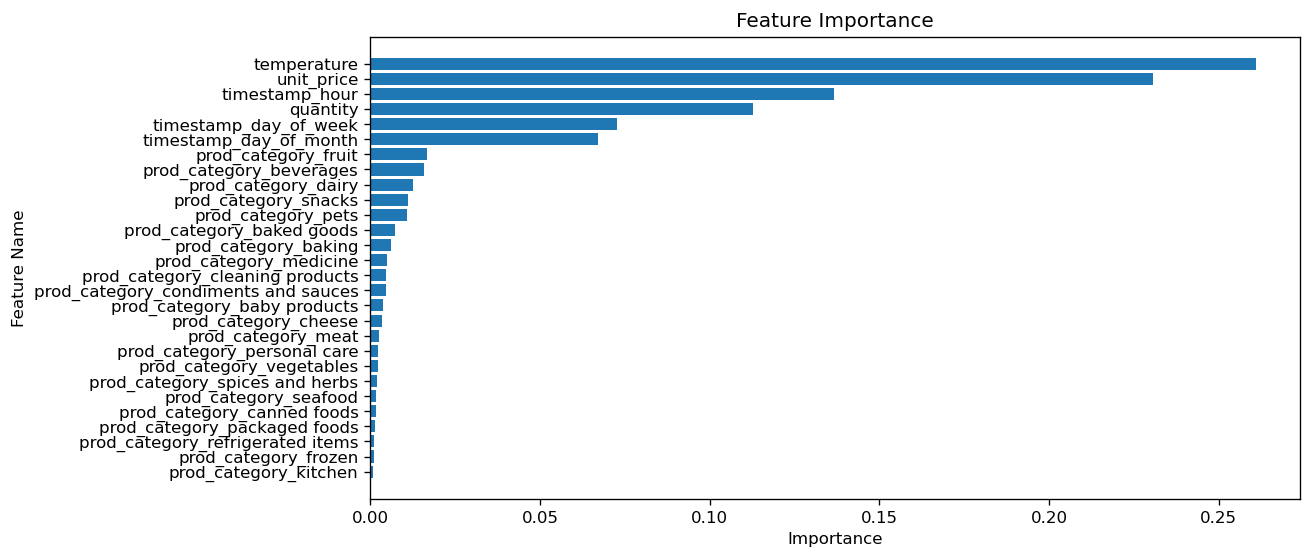

In [96]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')